## Clustering

1. CLustering is an Unsupervised ML that helps you identify the patterns from the data.

2. There are no labels as such and hence it is not as it seem to be Supervised ML. Hence, there is no prediction and only Exploration of the data to understad the data better.

3. The Clustering Algorithm that we are discussing right now is called K MEANS CLUSTERING...



### Fetch the Data from Scikit Learn

1. "load_dataset(name)" from sklearn

2. save it in some object for e.g. i = load_iris()

3. In order to fetch the data you will use i.data. (The data will be arrayed)


In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [40]:
# save the load iris in some object
ir = load_iris() # call this as a function...

In [3]:
print(i.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# Data
iris=pd.DataFrame(i.data, columns=i.feature_names)

In [5]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Deploying K Means Clustering

1. K Means Clustering works on the concept of finding the nearest neighbors.

2. Herein the nearest neighbors are found using Distance between the two points.

3. The way it does is it creates Centroids/Central Points within the data to begin with. 

4. Identify the distance of all the points with centroid.

5. If the distance is the least possible distance as it may appear to be, then the data points cling to that Cluster Centroid else the centroids keep changing their location so that we are doubly sure about the clusters getting formed....

In [6]:
from sklearn.cluster import KMeans

In [7]:
k = KMeans() # initiate the machine

In [8]:
pred=k.fit(iris, i.target).predict(iris) # Default k value = 08

In [9]:
pred

array([0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5, 0, 5, 5, 0, 0, 5, 5, 0,
       0, 5, 0, 5, 0, 5, 1, 1, 1, 7, 1, 7, 1, 2, 1, 7, 2, 7, 7, 4, 7, 1,
       7, 7, 4, 7, 4, 7, 4, 4, 1, 1, 1, 1, 4, 7, 7, 7, 7, 4, 7, 1, 1, 4,
       7, 7, 7, 1, 7, 2, 7, 7, 7, 1, 2, 7, 6, 4, 3, 6, 6, 3, 7, 3, 6, 3,
       6, 6, 6, 4, 4, 6, 6, 3, 3, 4, 6, 4, 3, 4, 6, 3, 4, 4, 6, 3, 3, 3,
       6, 4, 4, 3, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 4])

## Identifying the Optimal Cluster Size

1. We will be calculating the Within Cluster Sum of Sq Error.

2. If the WCSS is lowest for a certain point, that point will demonstrate the Optimal # Clusters.

In [10]:
k.cluster_centers_ # Centroid

array([[5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.52666667, 3.04666667, 4.6       , 1.45333333],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.03636364, 2.70909091, 4.90909091, 1.69545455],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [6.56086957, 3.06956522, 5.52608696, 2.15217391],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ]])

In [11]:
k.inertia_ # Error

30.290983238178892

In [12]:
# WCSS Calculation through Loop
wcss = []
cluster = range(1,10)

In [13]:
# Loop

for i in cluster:
    k = KMeans(n_clusters=i) # running clustering in Loop
    model = k.fit(iris) # Fiting the Model without target values
    wcss.append(k.inertia_) # append the error

In [14]:
# Visualize this...
import matplotlib.pyplot as plt
plt.plot(cluster, wcss, "-o", markerfacecolor="red", 
         linestyle = "dashed", markersize = 10)
plt.xlabel("# Clusters")
plt.ylabel("Error")
plt.title("Elbow Plot")
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.320426739926745,
 30.085307692307694,
 28.297603741030212]

In [41]:
# Fitting the K Means with 03 Cluster Size
k = KMeans(n_clusters=3)

In [42]:
pred_kmeans = k.fit(iris).predict(iris)

In [18]:
# centroids 
centroid = k.cluster_centers_

In [19]:
c1 = centroid[:,0] # Sepal Length Centroid
c2 = centroid[:, 1] # Sepal Width Centroid...

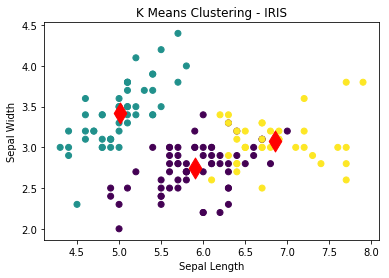

In [20]:
plt.scatter(iris[iris.columns[0]], iris[iris.columns[1]], 
            c = pred_kmeans)
plt.scatter(c1,c2, marker = "d", s = 220, c= "r")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K Means Clustering - IRIS")
plt.show()

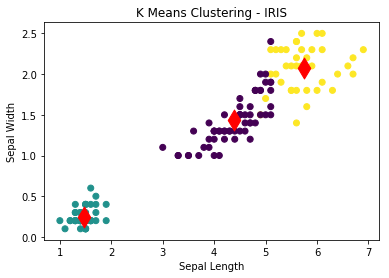

In [21]:
plt.scatter(iris[iris.columns[2]], iris[iris.columns[3]], 
            c = pred_kmeans)
plt.scatter(centroid[:, 2],centroid[:, 3], marker = "d", 
            s = 220, c= "r")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K Means Clustering - IRIS")
plt.show()

In [22]:
# Diabetes Dataset
from sklearn.datasets import load_diabetes
d = load_diabetes()

In [23]:
d.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
print(d.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [25]:
diabetes = pd.read_csv("./Downloads/diabetes.csv")

In [26]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
dataset = diabetes.drop("Outcome", axis = 1)

In [28]:
k = KMeans()

In [29]:
pred = k.fit(dataset).predict(dataset)

In [30]:
pd.DataFrame(k.cluster_centers_)

,0,1,2,3,4,5,6,7
0,4.097458,99.546610,71.686441,14.457627,1.978814,30.424153,0.396356,32.953390
1,4.187500,149.583333,75.041667,31.500000,282.520833,35.952083,0.567854,34.375000
2,3.736842,159.684211,71.052632,33.684211,484.473684,35.284211,0.554211,32.736842
3,4.975207,154.595041,79.338843,10.735537,0.355372,33.438017,0.472504,41.280992
4,2.805882,103.976471,68.623529,26.994118,80.435294,31.121765,0.475676,28.282353
5,3.555556,117.000000,0.666667,2.000000,0.694444,25.763889,0.393167,30.444444
6,3.718519,133.296296,71.800000,30.762963,163.266667,34.154074,0.560948,33.096296
7,1.666667,183.666667,73.333333,31.666667,756.666667,39.700000,1.051333,37.666667


In [31]:
# Find the Optimal Cluster Size
cluster = range(1,10)
error = []

In [32]:
for cluster_size in cluster:
    k = KMeans(n_clusters=cluster_size)
    k.fit(dataset)
    error.append(k.inertia_)

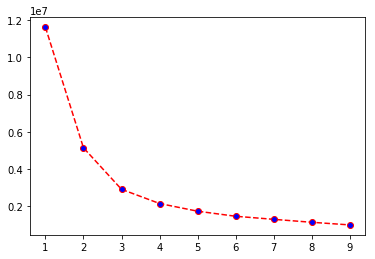

In [33]:
plt.plot(cluster, error, "-o", c = "r", 
         markerfacecolor="blue", linestyle = "dashed")
plt.show()

In [34]:
error

[11615812.918327227,
 5142376.455984383,
 2913322.58008178,
 2151126.9425235316,
 1737626.3385149883,
 1466591.4021123825,
 1301095.9853839797,
 1143409.4096190135,
 1001679.0317468981]

In [35]:
2151320.938003855-1737324.9738019141

413995.9642019407

In [36]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
plt.scatter(dataset.Glucose, dataset.BMI, c =pred_clusters)
plt.scatter(centres["Glucose"], centres["BMI"], marker = "d",c = "r",
           s = 120)

NameError: name 'pred_clusters' is not defined

In [ ]:
# Fitting the No of Clusters = 4
k = KMeans(n_clusters=4)

In [ ]:
pred_clusters = k.fit(dataset).predict(dataset)

In [ ]:
centres = pd.DataFrame(k.cluster_centers_, columns=dataset.columns)

In [ ]:
centres["Glucose"]

## Findings

1. BMI and Glucose are very much linked together

2. Although we have used these variables but the role of cluster is not identified. If I assume that people are diabetic vs non diabetic then the rest of the 02 cluster centroids have some meaningful information that is needed to be decoded.

3. We get the cluster size as 4 and hence we need to find out more information about these groups.

## OPTIMAL # of CLUSTERS is Dependant on the Business/ Process

In [39]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# IRIS Labels
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [44]:
# Append the Pred_kmeans in IRIS Dataset
pred = pd.DataFrame(pred_kmeans)

In [47]:
pred.columns=["Species"] # Renaming the column of Pred

In [50]:
# Append the pred df into IRIS
newiris = pd.concat([iris,pred], axis = 1)

# Silhoutte Score

Higher the Silhoutte Score, the better the clustering would be...


In [51]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(iris, newiris.Species)

0.5525919445213676

In [53]:
cluster_size = [2,3,4,5,6]

In [55]:
sil = []
silhoutte = []
for s in cluster_size:
    k = KMeans(n_clusters=s)
    model = k.fit(iris).predict(iris)
    sil = silhouette_score(iris, model) # calc the silhoutte score
    silhoutte.append(sil)
    print("On Cluster ", s, "The Silhoutte is ", sil)

On Cluster  2 The Silhoutte is  0.6808136202713507
On Cluster  3 The Silhoutte is  0.5525919445213676
On Cluster  4 The Silhoutte is  0.49722797262968016
On Cluster  5 The Silhoutte is  0.4885175508538632
On Cluster  6 The Silhoutte is  0.36951627458890624


Text(0.5,1,'Silhoutte Plot')

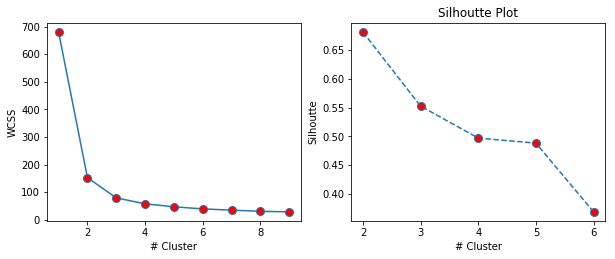

In [65]:
plt.figure(figsize=[10,8])
plt.subplot(221)
plt.plot(cluster, wcss, "-o", markerfacecolor = "red", markersize = 8)
plt.xlabel("# Cluster")
plt.ylabel("WCSS")

plt.subplot(222)
plt.plot(cluster_size, silhoutte, "-o", markerfacecolor = "red", 
         markersize = 8, linestyle="dashed")
plt.xlabel("# Cluster")
plt.ylabel("Silhoutte")
plt.title("Silhoutte Plot")

Remember that Silhoutte Value has to be considered with WCSS. If the WCSS is high and Silhoutte is also high then such Cluster value will not be considered. We will be considering Silhoutte only in case where the WCSS is lowest...